In [1]:
using DrWatson

@quickactivate

In [ ]:
# so we can keep adding packages to the venv
"""using Pkg
Pkg.add("CairoMakie")"""

   Resolving package versions...
   Installed Pango_jll ── v1.56.3+0
   Installed CairoMakie ─ v0.13.10
    Updating `~/Desktop/Uni/PhD/open_q_systems/open_system_tn/Project.toml`
⌃ [13f3f980] + CairoMakie v0.13.10
    Updating `~/Desktop/Uni/PhD/open_q_systems/open_system_tn/Manifest.toml`
  [159f3aea] + Cairo v1.1.1
⌃ [13f3f980] + CairoMakie v0.13.10
  [a2bd30eb] + Graphics v1.1.3
  [36c8627f] + Pango_jll v1.56.3+0
        Info Packages marked with ⌃ have new versions available and may be upgradable.
Precompiling project...
    614.1 ms  ✓ Graphics
    752.9 ms  ✓ Pango_jll
   2037.8 ms  ✓ Cairo
  46367.1 ms  ✓ CairoMakie
  4 dependencies successfully precompiled in 50 seconds. 494 already precompiled.


In [14]:
using CairoMakie

In [ ]:
using QuantumToolbox


┌ Warning: attempting to remove probably stale pidfile
│   path = /Users/santiago/.julia/compiled/v1.11/QuantumToolbox/PNWvT_Gy6rC.ji.pidfile
└ @ FileWatching.Pidfile /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/FileWatching/src/pidfile.jl:278


In [118]:
N = 3 # local hilbert space dimension
L = 3 # size of the chain
ω = 1.0 # frequency of the harmonic oscillator
J = 0.5
γ = 0.1 # damping rate

a = destroy(N) # annihilation operator
a1 = tensor(a,  qeye(N), qeye(N))
a2 = tensor(qeye(N), a , qeye(N))
a3 = tensor(qeye(N),qeye(N),a)

H = ω * a1' * a1 + ω * a2' * a2 + ω * a3' * a3  + J* (a1' * a2 + a2' * a3 + a3' * a2 + a2' * a1) 


Quantum Object:   type=Operator()   dims=[3, 3, 3]   size=(27, 27)   ishermitian=true
27×27 SparseArrays.SparseMatrixCSC{ComplexF64, Int64} with 74 stored entries:
⎡⢐⢔⠄⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠁⢕⢕⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠐⢄⠀⠑⢄⢄⠁⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠑⠄⠑⢑⢔⠄⠑⢄⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⢄⠁⠑⢄⢀⠑⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠑⢄⠐⠕⢅⢄⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⠑⠄⎦

In [119]:
ψ0 = tensor(fock(L, 2),fock(L,0),fock(L,0)) # initial state
c_ops = [sqrt(γ) * a2]
e_ops = [a1' * a1, a2' * a2, a3' * a3]
tlist = range(0, 20, 100) # time list


result = mesolve(H, ψ0, tlist, c_ops, e_ops = e_ops)

Progress: [==============================] 100.0% --- Elapsed Time: 0h 00m 00s (ETA: 0h 00m 00s)


Solution of time evolution
(return code: Success)
--------------------------
num_states = 1
num_expect = 3
ODE alg.: OrdinaryDiffEqTsit5.Tsit5{typeof(OrdinaryDiffEqCore.trivial_limiter!), typeof(OrdinaryDiffEqCore.trivial_limiter!), Static.False}(OrdinaryDiffEqCore.trivial_limiter!, OrdinaryDiffEqCore.trivial_limiter!, static(false))
abstol = 1.0e-8
reltol = 1.0e-6


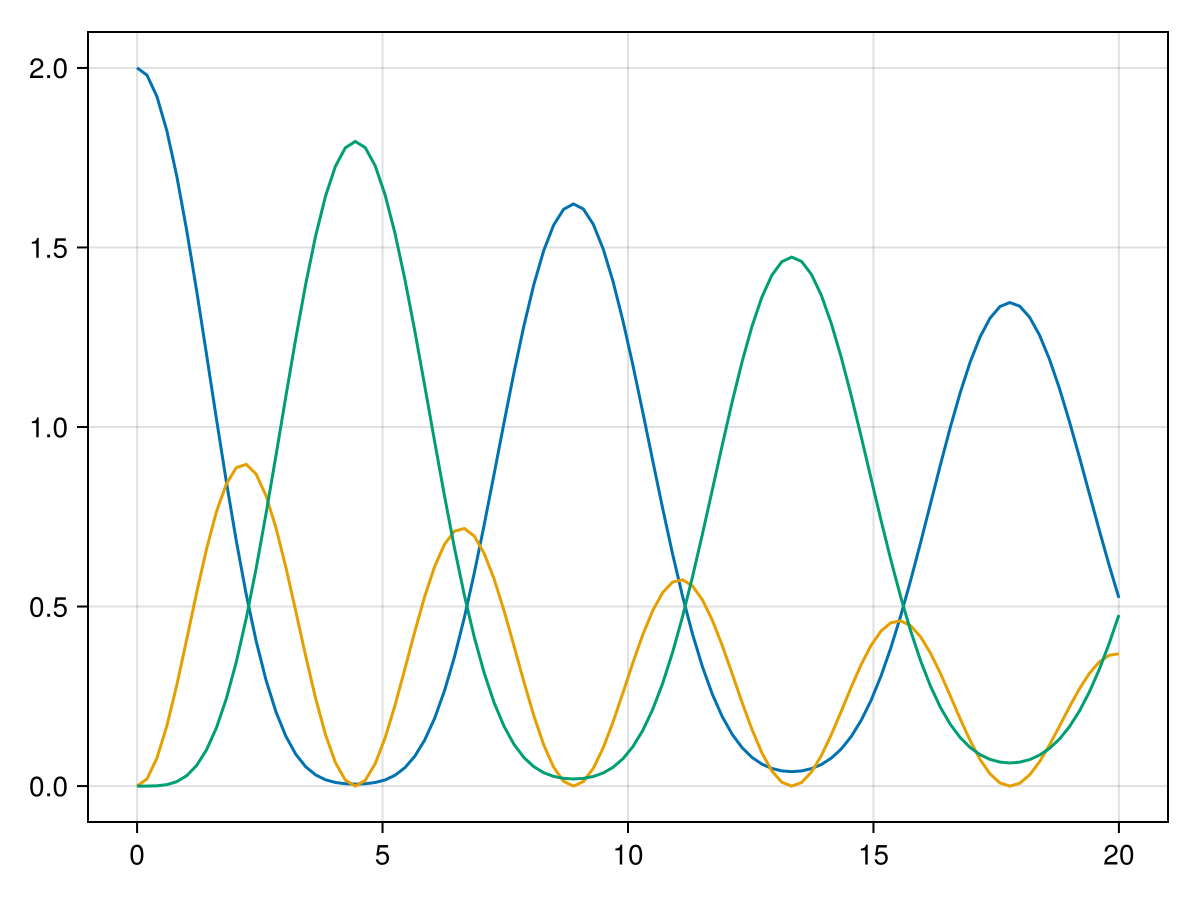

In [120]:
f = Figure()
ax = Axis(f[1, 1])

lines!(tlist, real(result.expect[1,1:end]))
lines!(tlist, real(result.expect[2,1:end]))
lines!(tlist, real(result.expect[3,1:end]))


f

In [121]:
result.expect[1,1:end]

100-element Vector{ComplexF64}:
 2.0000000000000004 + 0.0im
 1.9797485170570082 - 1.4397935166338033e-39im
 1.9202824198217068 + 2.0690113457008213e-37im
 1.8249539352330415 + 1.2972305852538143e-35im
  1.698787754533356 + 3.582635579261606e-34im
 1.5481195221498383 + 2.441127380309076e-33im
 1.3801571810650093 - 1.500993132963186e-33im
  1.202499757106017 + 1.124873958130597e-32im
  1.022650574753304 + 4.117816481183556e-32im
 0.8475612323939425 + 4.954852883026341e-32im
                    ⋮
 1.2554897027699115 - 1.4331652505108883e-31im
 1.1885393863954539 - 1.8655841824784756e-31im
 1.1076640065520371 - 1.8841305042213646e-31im
 1.0162461180926379 - 2.408622097739575e-31im
  0.917897693084041 - 3.1301092756790606e-31im
 0.8162493612611632 - 3.396055942196704e-31im
 0.7147509428402792 - 3.0202910957379985e-31im
 0.6164971424165058 - 2.71865245799462e-31im
 0.5240898086712814 - 2.611786856004056e-31im

In [122]:
result.expect

3×100 Matrix{ComplexF64}:
 2.0+0.0im     1.97975-1.43979e-39im  …   0.52409-2.61179e-31im
 0.0+0.0im   0.0200641+3.35397e-37im     0.368334+1.48099e-31im
 0.0+0.0im  5.15265e-5+3.59075e-39im     0.476477-2.50253e-31im